**Imports & Setup**

In [9]:
import sys
sys.path.append("..")

from src.pipeline import run_pipeline
from src.ml import compute_garch_volatility
import pandas as pd
import matplotlib.pyplot as plt

This notebook demonstrates how the volatility & risk signal system behaves over time.

All computation is handled by the core pipeline.

**System Execution**

In [3]:
df, alerts = run_pipeline()
df.tail()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,Return,Volatility,Risk_Level,Market_Regime,Risk_Change
Ticker,EEM,EEM,EEM,EEM,EEM,,,,,
Date,,,,,,,,,,
2026-01-05,56.860001,56.860001,56.360001,56.590000,37082500,0.011024,0.009000,Low,Calm,False
2026-01-06,57.279999,57.430000,57.160000,57.169998,29801700,0.007387,0.008996,Low,Calm,False
2026-01-07,56.849998,57.049999,56.799999,57.029999,26931300,-0.007507,0.009233,Low,Calm,False
2026-01-08,56.869999,56.889999,56.619999,56.750000,27719800,0.000352,0.009194,Low,Calm,False
2026-01-09,57.125000,57.160000,56.720001,56.880001,24127330,0.004484,0.008994,Low,Calm,False


**Volatility plot**

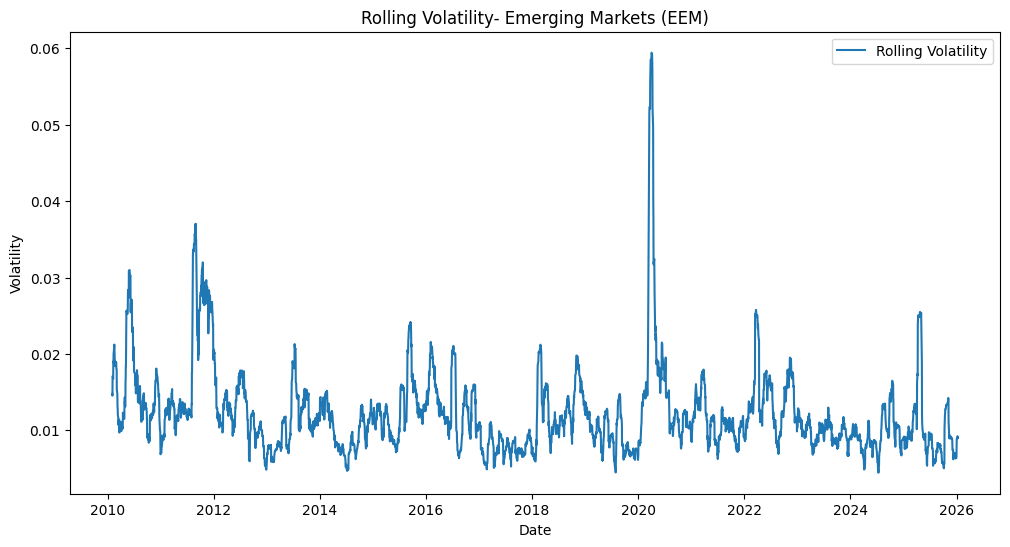

In [4]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df["Volatility"], label="Rolling Volatility")
plt.title("Rolling Volatility- Emerging Markets (EEM)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()

**Rolling vs GARCH Volatility**

c:\projects\volatility-risk-system\venv\Lib\site-packages\arch\univariate\base.py:694: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001799. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  self._check_scale(resids)


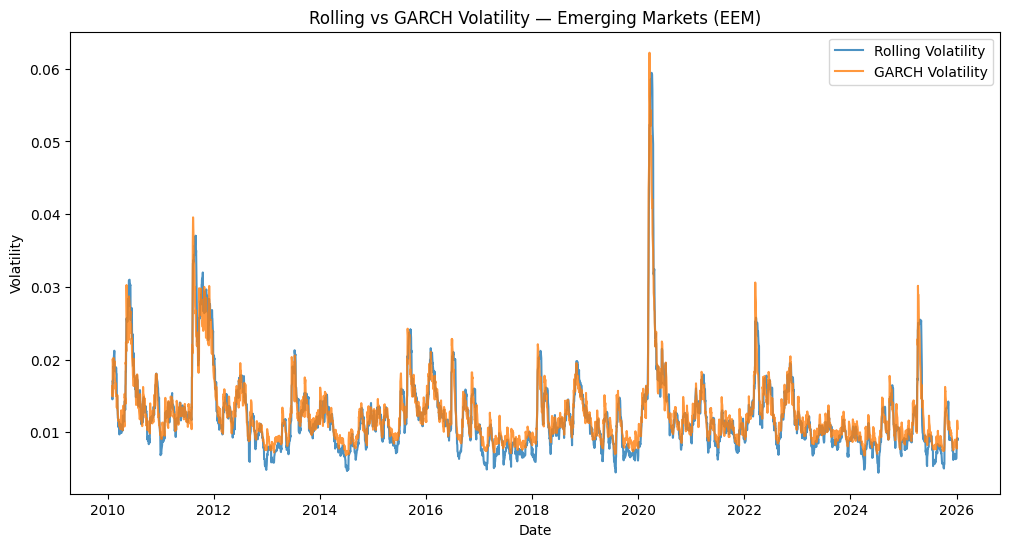

In [11]:
df["GARCH_Volatility"] = compute_garch_volatility(df["Return"])
df = df.dropna()

plt.figure(figsize=(12,6))
plt.plot(df.index, df["Volatility"], label="Rolling Volatility", alpha=0.8)
plt.plot(df.index, df["GARCH_Volatility"], label="GARCH Volatility", alpha=0.8)
plt.title("Rolling vs GARCH Volatility — Emerging Markets (EEM)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()

Rolling volatility provides a smooth and interpretable measure of market risk.
GARCH volatility reacts faster to sudden shocks and captures volatility clustering.

During crisis periods, GARCH volatility typically spikes earlier and more sharply,
making it useful as an early-warning signal rather than a replacement for rolling
volatility.

**Crisis Regimes**

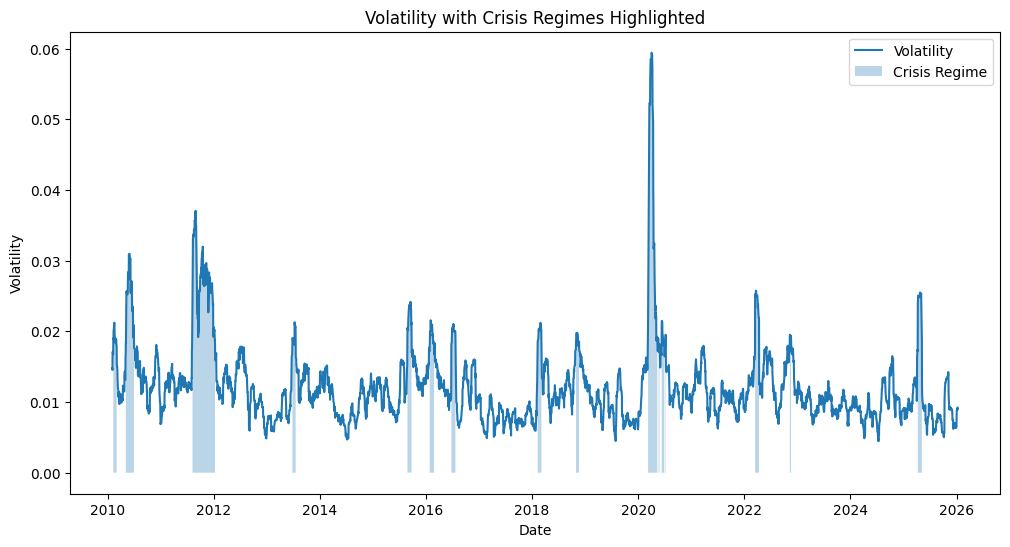

In [5]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df["Volatility"], label="Volatility")

crisis = df["Market_Regime"] == "Crisis"
plt.fill_between(
    df.index,
    0,
    df["Volatility"],
    where=crisis,
    alpha=0.3,
    label="Crisis Regime"
)

plt.title("Volatility with Crisis Regimes Highlighted")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()

**Annotating Known Crisis Periods**

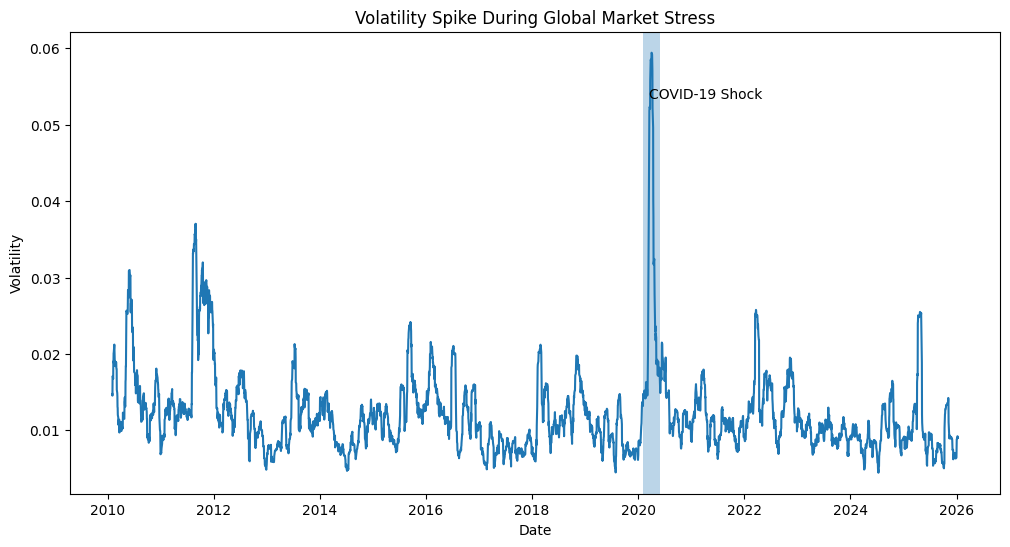

In [6]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df["Volatility"])

plt.axvspan("2020-02-01", "2020-06-01", alpha=0.3)
plt.text(pd.to_datetime("2020-03-15"), df["Volatility"].max()*0.9, "COVID-19 Shock")

plt.title("Volatility Spike During Global Market Stress")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.show()

The system flags extreme volatility during known crisis events, such as the COVID-19 market shock.

**Alerts**

In [7]:
alerts[["Risk_Level", "Market_Regime"]].head(10)

Price,Risk_Level,Market_Regime
Ticker,,
Date,,
2010-01-04,Low,Calm
2010-02-02,Medium,Calm
2010-02-09,High,Crisis
2010-03-05,Medium,Calm
2010-03-10,Low,Calm
2010-04-27,Medium,Calm
2010-05-06,High,Crisis
2010-07-02,Medium,Calm


Alerts are triggered when the system detects a change in market risk conditions. These can be used by portfolio managers to adjust exposure.